# Data analysis of the Wisconsin Breast Cancer Original Dataset

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-analysis-of-the-Wisconsin-Breast-Cancer-Original-Dataset" data-toc-modified-id="Data-analysis-of-the-Wisconsin-Breast-Cancer-Original-Dataset-1">Data analysis of the Wisconsin Breast Cancer Original Dataset</a></span><ul class="toc-item"><li><span><a href="#1.-Overview-and-Background" data-toc-modified-id="1.-Overview-and-Background-1.1">1. Overview and Background</a></span></li><li><span><a href="#2.-Review-of-Classifiers-and-Performance" data-toc-modified-id="2.-Review-of-Classifiers-and-Performance-1.2">2. Review of Classifiers and Performance</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#The-following-diagram-explains-how-Random-Forest-works--" data-toc-modified-id="The-following-diagram-explains-how-Random-Forest-works---1.2.0.1">The following diagram explains how Random Forest works -</a></span></li></ul></li></ul></li><li><span><a href="#3.-Classifier-to-be-applied" data-toc-modified-id="3.-Classifier-to-be-applied-1.3">3. Classifier to be applied</a></span></li><li><span><a href="#4.-Statistical-Analysis" data-toc-modified-id="4.-Statistical-Analysis-1.4">4. Statistical Analysis</a></span></li></ul></li><li><span><a href="#5.-Machine-Learning---KNN" data-toc-modified-id="5.-Machine-Learning---KNN-2">5. Machine Learning - KNN</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#5.1-Setting-the-target" data-toc-modified-id="5.1-Setting-the-target-2.0.1">5.1 Setting the target</a></span></li></ul></li></ul></li></ul></div>

## 1. Overview and Background

The following analysis is of the Wisconsin Cancer Original Dataset. In the dataset there is 9 attributes that are used to be classfied in Diagnosis column which are beneign or malignent. In the context of this dataset beniegn is where the tumour will have no harmful effect on patient and the malignent means there is harmful.

According the description of the dataset is from different timings and can be separated into the following groups:
- Group 1: 367 instances (January 1989)
- Group 2:  70 instances (October 1989)
- Group 3:  31 instances (February 1990)
- Group 4:  17 instances (April 1990)
- Group 5:  48 instances (August 1990)
- Group 6:  49 instances (Updated January 1991)
- Group 7:  31 instances (June 1991)
- Group 8:  86 instances (November 1991)
- Total:   699 points (as of the donated datbase on 15 July 1992)


The attributes that contribute to the classifiers mentioning in the opening lines are the following and are scored in the domain of 1-10:

Attribute                     Domain
1. Sample code number            id number
2. Clump Thickness               1 - 10
3. Uniformity of Cell Size       1 - 10
4. Uniformity of Cell Shape      1 - 10
5. Marginal Adhesion             1 - 10
6. Single Epithelial Cell Size   1 - 10
7. Bare Nuclei                   1 - 10
8. Bland Chromatin               1 - 10
9. Normal Nucleoli               1 - 10
10. Mitoses                       1 - 10
11. Class:                        (2 for benign, 4 for malignent)

This is the context of the dataset that will be reviewed and analysed in the project.

In [18]:
# imports to be used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load in the dataset
# headers in the excel are as follows 
# id,"clump_thickness","size_uniformity","shape_uniformity","marginal_adhesion","epithelial_size",
#"bare_nucleoli","bland_chromatin","normal_nucleoli","mitoses","class"

# Set the headers in shorter version
# remove the the longer format with header=None
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('data\Wisconsin_breast_cancer_data.csv',    
         header=None, index_col=['ID'], names = headers)

In [3]:
# View the shape of the dataset
data.shape

(699, 10)

In [4]:
# check if there is any null values in the columns.
data.isnull().sum()

CT           0
UCSize       0
UCShape      0
MA           0
SECSize      0
BN           0
BC           0
NN           0
Mitoses      0
Diagnosis    0
dtype: int64

In [5]:
# check that the data is correct
data.head(10)

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
ID,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4
1018099,1,1,1,1,2,10,3,1,1,2
1018561,2,1,2,1,2,1,3,1,1,2
1033078,2,1,1,1,2,1,1,1,5,2


In [6]:
# check the end rows to ensure the dataset matches
data.tail(10)

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
ID,,,,,,,,,,
654546,1,1,1,1,2,1,1,1,8,2
654546,1,1,1,3,2,1,1,1,1,2
695091,5,10,10,5,4,5,4,4,1,4
714039,3,1,1,1,2,1,1,1,1,2
763235,3,1,1,1,2,1,2,1,2,2
776715,3,1,1,1,3,2,1,1,1,2
841769,2,1,1,1,2,1,1,1,1,2
888820,5,10,10,3,7,3,8,10,2,4
897471,4,8,6,4,3,4,10,6,1,4


In [7]:
# check the datatypes
data.dtypes

CT            int64
UCSize        int64
UCShape       int64
MA            int64
SECSize       int64
BN           object
BC            int64
NN            int64
Mitoses       int64
Diagnosis     int64
dtype: object

In [8]:
# Bare Nuclei field should be an integer field. According to the dtypes command it is an object so I am going to change
# incase there is any issues later on in the data analysis
data['BN'] = pd.to_numeric(data['BN'], errors='coerce')

In [9]:
# Get the count of each value within each column
for var in data.columns:
    
    print(data[var].value_counts())

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: CT, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: UCSize, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: UCShape, dtype: int64
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: MA, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: SECSize, dtype: int64
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: BN, dtype: int64
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: BC, dtype: int64
1     443
10     61
3      44
2      36
8      24
6      22
5      19
4      18
7      16
9      16
Name:

In [10]:
# Transpose the data
data.describe()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## 2. Review of Classifiers and Performance

For the dataset the Diagnosis column will be the classifier. There will be 2 classes which are Beneign and Malignent. Firstly I will review two classifier methods used in a study conducted in the University of Surrey, Guildford, in the UK. In this study, two ensemble ML classifier: eXtreme Gradient Boosting (XGBoost) and Random Forest (RF) classifiers are used to test the Wisconsin Breast Cancer dataset(An Evaluation of the WBDC).

XG boost is a decision-tee based Machine Learning algorithm which used a gradient boosting framework. So the XGboost is a more powerful version gradient boosting as both use Decision Trees which are made up of binary questions and the final predictions happen at the leaf. (Wikipedia)

Boosting is to attempt to build a strong classifier from a number of weak classifiers. With booosting it begins by building the first made which is from the training data. Then from this first model, the second model is built by correcting the errors . This procedure is continued in the complete training data is predicted correctly.

XG boost uses Cross-Validation as its evaluation process. In this process it estimates the unseen data by generating many non-overlapping train/test splits into training data and reporting the average test set performance across all data splits. (towardsdatascience) 

XG Boost is ususing used on larger datasets that have more than 1000 training samples, that have less than 100 features. So really compared to the Gradient Boosting, its main difference is that it can work quicker through larger datasets.

##### The following diagram is to explain the process of XGboost:

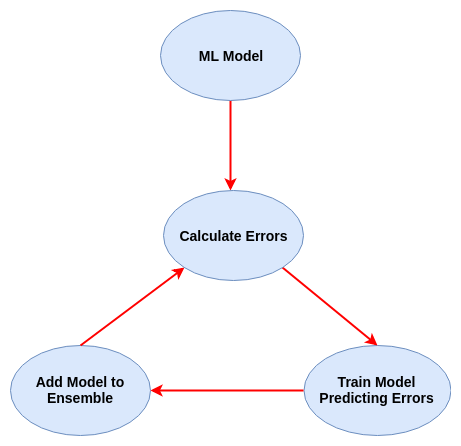

Random forest builds a multitude decision trees from different samples at training times, then takes the majority vote for the classification and in the case of regression it takes the average vote. (analyticsvidhya) A decision tree is really a question posed and then you have a choice of yes or no. Descision trees are sensitive to the training data, one change to the data, can change the leafs in the decision tree completely. Random forests will generally perform better than decision trees but their accuracy can be lower than gradient boosted trees.(Wikipedia)

In the study, Random Forest will take more processing time, as the decision trees will have to be created so the algorithm will have to parse through the data. With Random Forest will reduce the ris of overfitting as there will be a robust number of decision trees, which will get the average, therefore lead to less errors.

Random forest is used in Finance, as it allows businesses to spend less time on data management and pre-preprocessing tasks. Customers who have a high credit risks can be evaluated. (ibm)

#### The following diagram explains how Random Forest works -

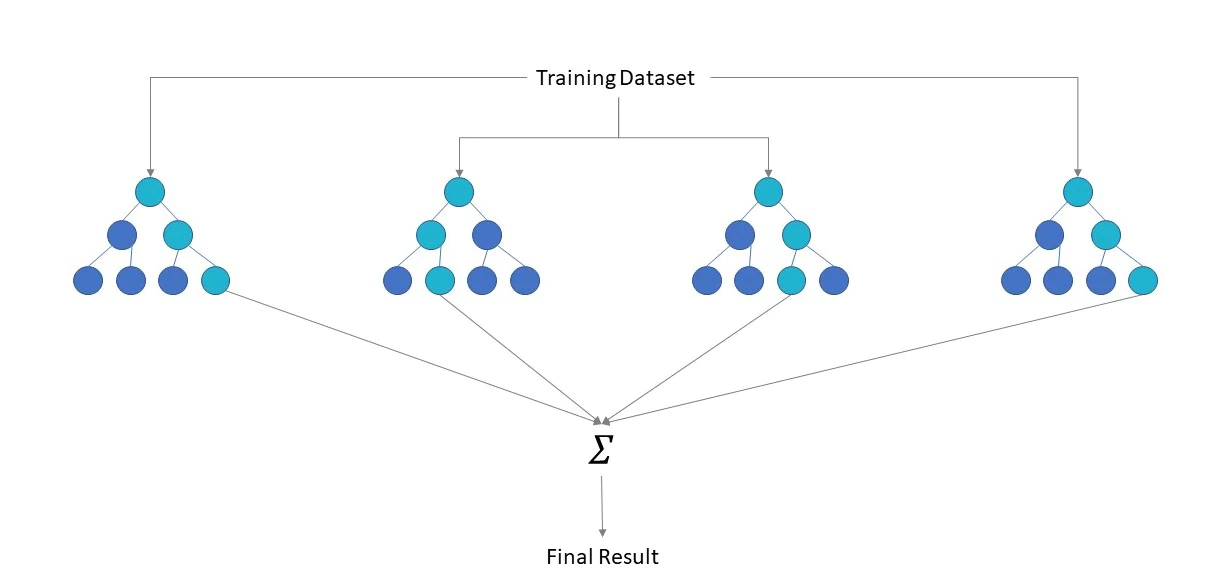

In the study, the data was cleansed with the help of Python where the investigators found there ws 16 records which needed to be dropped as they had missing data. Then they pinpointed 5 features as the best for the classification task. The features used were the following Uniformity of Cell Size, Uniformity of Cell Shape, Bland Chromatin, Normal Nucleoli, and 
Mitoses. In addition, they used the min max normalization to scale the features between 0 and 1 to remove the 
skewness that is associated with the dataset. In the experiment they split the data into the ratio of 80/20 where 80 was the training data and 20 was the test set. 

The classifiers performances were evaluated using metrics such as Accuracy, Precision, Recall, and F1- Score. Based off the results it was found that XGBoost had the highest classification accuracy with a score of 98.53% against Random Forest which had a score of 98.53%. So they tested based off the classifier performance metrisc and found again that XGBoost had the classification accuracy with 99.2% against Random Forest with a score of 98.05%. (An Evaluation of the WBDC)

The main take away from the results of both Machine Learning approaches is that both had a high classification accuracy rate. The hardest part according to the authors was classifying the data. As I already explained about the Random Forest, it probably took longer and had less accuracy due the processing of the data.

## 3. Classifier to be applied

Based on the size of the data input I am going to use K-nearest Neighbours Algorithm. It can be used for both classification and regression problems in data analysis. This is a supervised machine learning algorithm which relies on the input data which is labelled. With the Wisconsin Breast Original dataset, this has the attributes labelled and is not a very big dataset. The KNN Algorithm has been known to be very trustworthy and reliable. 

Based off the dataset I will be reviewing, I think these characteristics are best for the medical fields. With the dataset being defined already, the algorithm can make the assumptions more easily,

For KNN classification, the point is classified based on the the neighbour types. The data point is assigned for the most frequent class to K nearest neighbours. For the KNN regression, it is the average of the K nearest neighbors. 

A classification problem has a discrete value as its output. For example you ask a question with yes or no as the possible answers. No in between, the answers are described as discrete. For regression this takes an example which is a row in a dataset. You can have for example height and weight, you then set an independent variable and you have a dependent variable. What KNN does in this case if they find similar input they will class it as neighbout rather than trying to understand the data structure like unsupervised learning. (towarddatascience-KNN)

## 4. Statistical Analysis

In [11]:
# Check the frequency of class
data['Diagnosis'].value_counts()

2    458
4    241
Name: Diagnosis, dtype: int64

In [12]:
# percentage of frequency distribution of class
data['Diagnosis'].value_counts()/np.float64(len(data))

2    0.655222
4    0.344778
Name: Diagnosis, dtype: float64

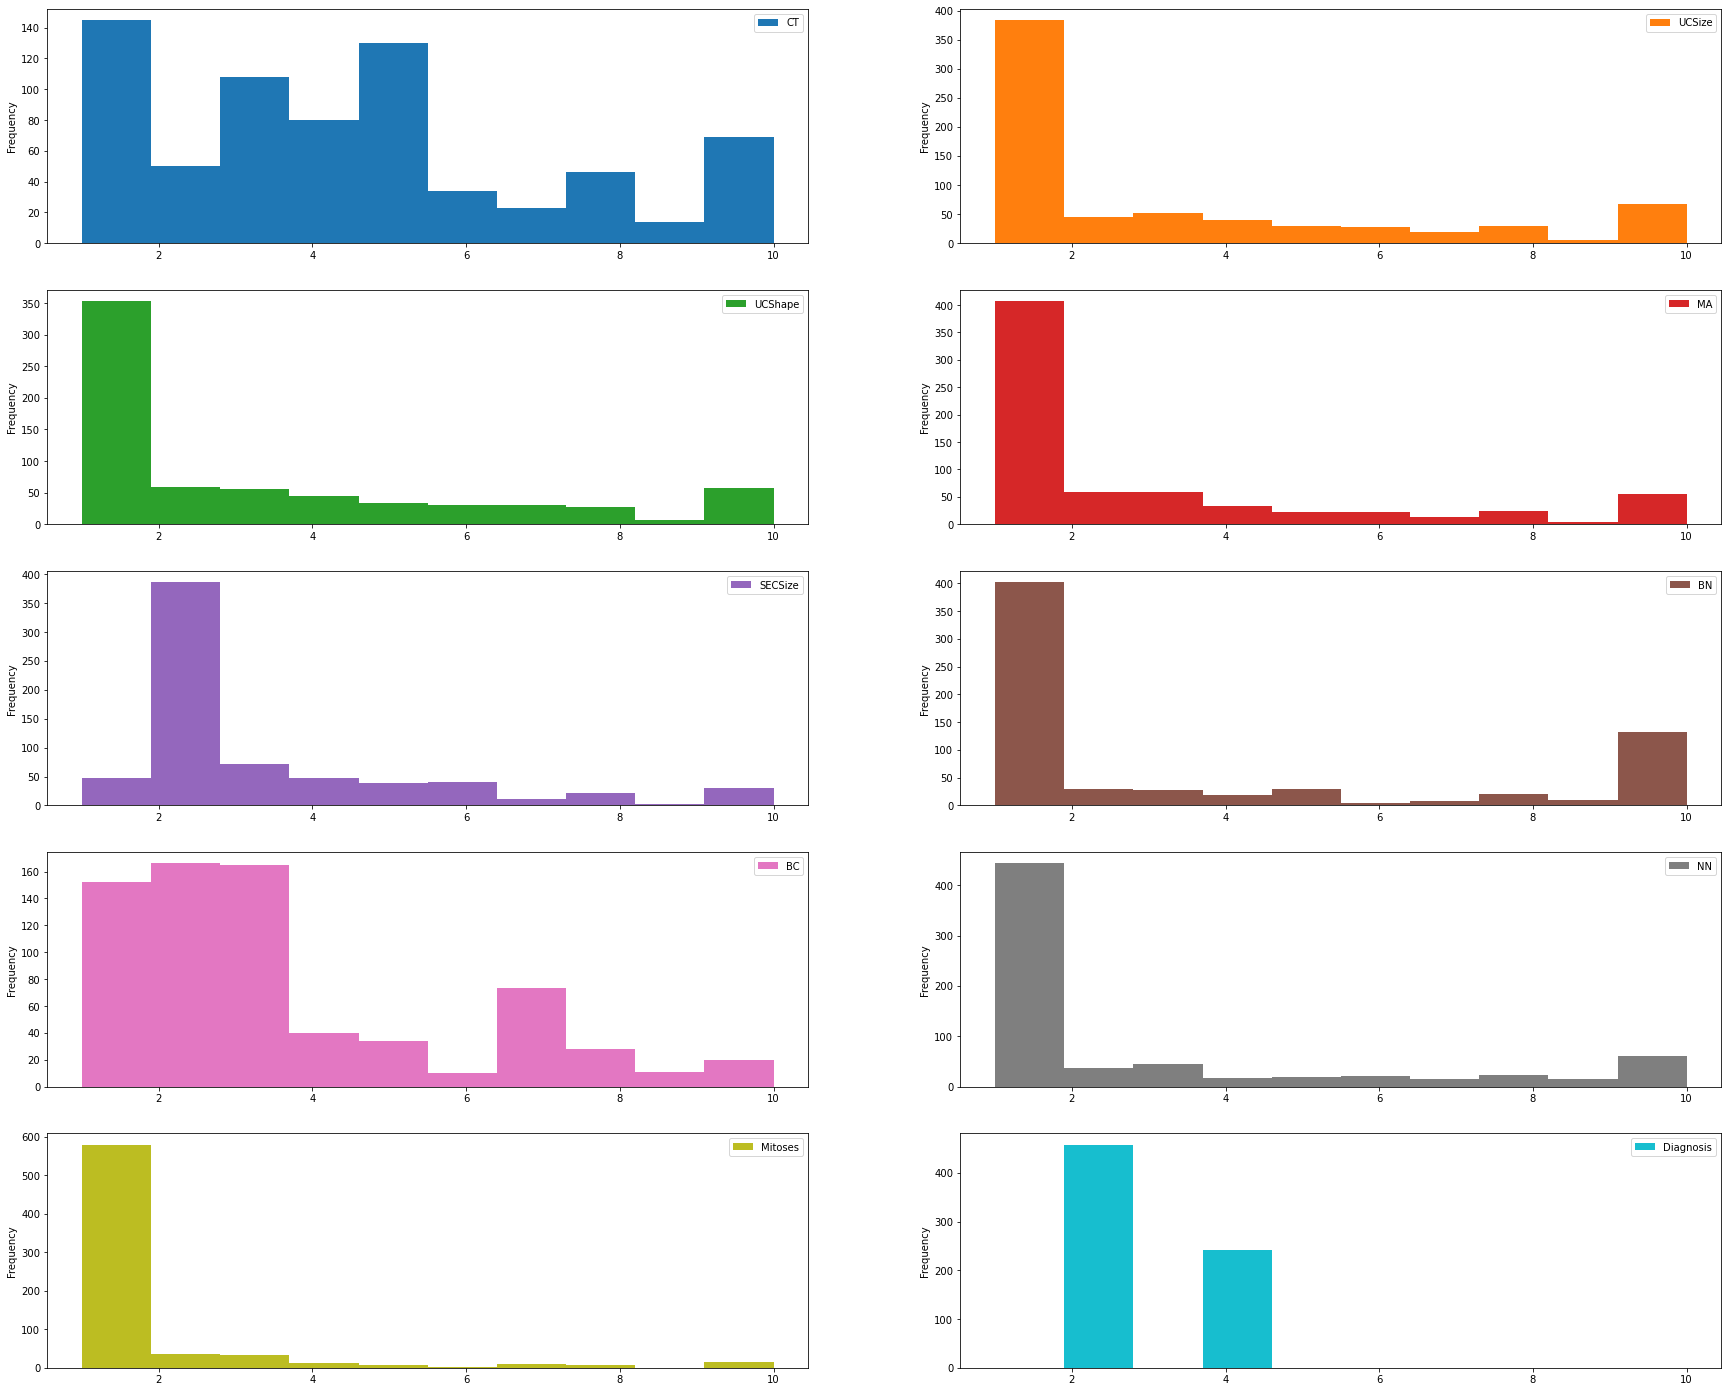

In [13]:
# check the distributions of variables over histograms

plt.rcParams['figure.figsize']=(30,25)

#sharez and sharey to show the axises for the sub plots
data.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

The majority of the values are clustered at the lower scores for the different attributes. Clump thickness has a density for the different values compared to the rest of the attributes.

In [14]:
# get the correlation between the attributes
corr = data.corr()

In [15]:
# For this data anlaysis the target variable is diagnosis 
# will get the correlation for diagnosis

corr['Diagnosis'].sort_values(ascending=False)

Diagnosis    1.000000
BN           0.822696
UCShape      0.818934
UCSize       0.817904
BC           0.756616
CT           0.716001
NN           0.712244
MA           0.696800
SECSize      0.682785
Mitoses      0.423170
Name: Diagnosis, dtype: float64

The majority of the attributes are over 0.5 when the correlation is returned in relation to the diagnosis. The highest correlated is Bare Nuclei, so patients with a higher score in this attribute will have a higher probability of having the diagnosis of Malignent.

This data is quite striking as there is very high correlation for Uniformity Cell Shap and Uniformity Cell Size. So it would make assume when a patient has a Malignent diagnosis the tumour will have high correlation for a few attributes.


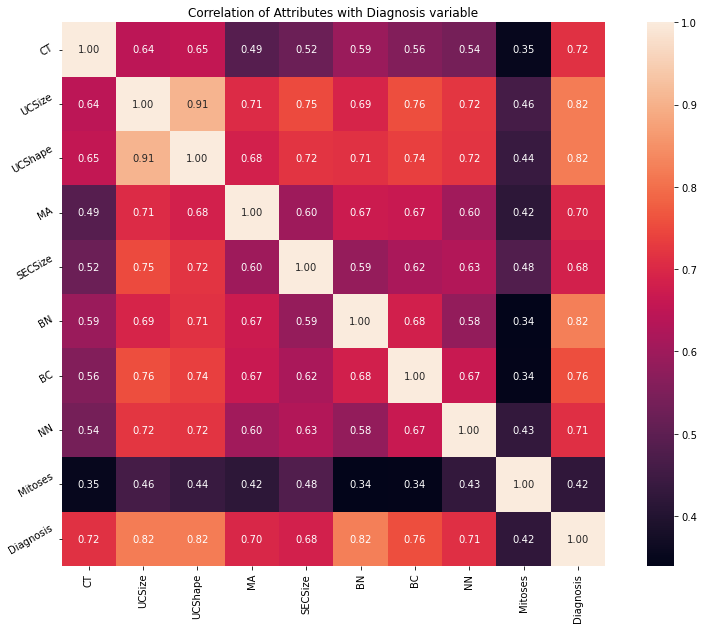

In [25]:
# Visualise the data on a heatmap

# set the size of the heatmap
plt.figure(figsize=(15,10))
# title of the heatmap
plt.title('Correlation of Attributes with Diagnosis variable')
# call the correlation, set value to True, set the rectangles. font and linecolour
a = sns.heatmap(corr, square=True, annot=True, fmt='.2f', linecolor='white')
# labels set for the axises
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
# show the heatmap
plt.show()

# 5. Machine Learning - KNN

### 5.1 Setting the target
Setting the target variable is setting the variable that you want to understand from clearly. For this dataset it is clear from the start that Diagnosis is the target to find out is the Diagnosies Benign or Malignent. 

In [27]:
# setting the target variable
x = data.drop(['Diagnosis'], axis=1)

y = data['Diagnosis']

In [32]:
# splitting the target 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [33]:
x_train.shape, x_test.shape

((559, 9), (140, 9))